# **Reporte de banco de pruebas**

Reporte y analisis exploratorio de datos de la curva de empuje de un motor tipo cohete Antares Aerospace

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import simpson

In [2]:
empuje = pd.read_csv("/home/fernudev/Documents/2024-03-28-05:05:33-EngineTest.cvs")

In [3]:
empuje

,Time,Trust
0,0.1,0.0
1,0.2,0.0
2,0.3,0.0
3,0.4,0.0
4,0.5,0.0
...,...,...
69,7.0,0.0
70,7.1,0.0
71,7.2,0.0
72,7.3,0.0


In [4]:
empuje["Trust"].shape

(74,)

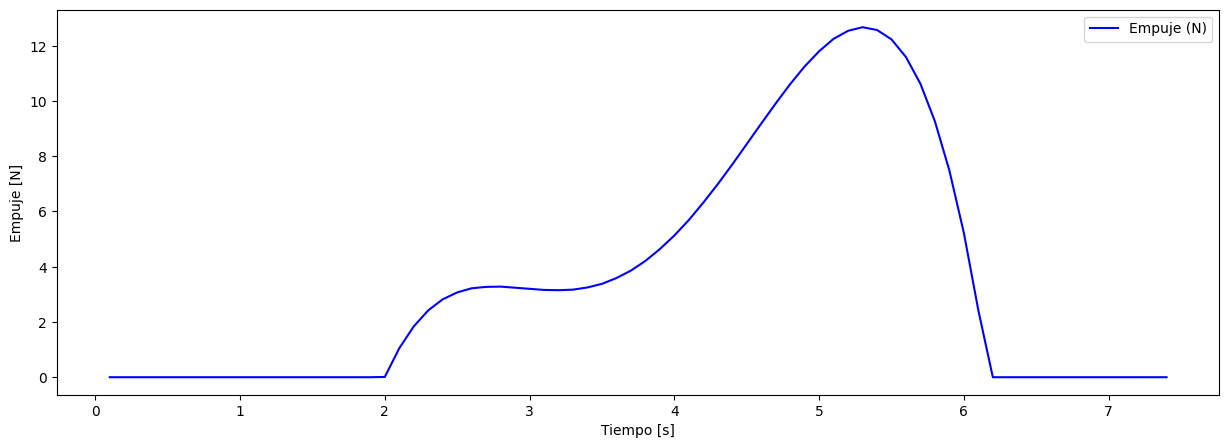

In [5]:
plt.figure(figsize=(15, 5))
plt.plot(empuje["Time"], empuje["Trust"], 'b', label="Empuje (N)")
plt.ylabel("Empuje [N]")
plt.xlabel("Tiempo [s]")
plt.legend()
plt.show()

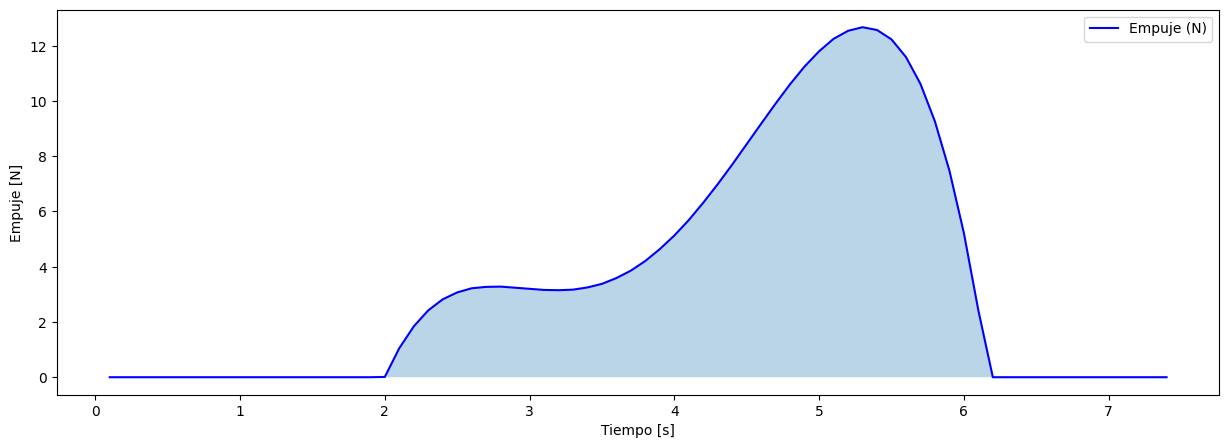

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(empuje["Time"], empuje["Trust"], 'b', label="Empuje (N)")
plt.fill_between(empuje["Time"], empuje["Trust"], alpha=0.3)
plt.ylabel("Empuje [N]")
plt.xlabel("Tiempo [s]")
plt.legend()
plt.show()

In [7]:
# Calculamos el empuje maximo y el impulso total
empuje_max = empuje["Trust"].max()
impulso_total = simpson(y=empuje["Trust"], x=empuje["Time"])

# Punto de mayor empuje
id_empuje_max = empuje["Trust"].idxmax()
tiempo_empuje_max = empuje["Time"][id_empuje_max]

print(f"Empuje maximo: {empuje_max} N")
print(f"Impulso total: {impulso_total} Ns")
print(f"Tiempo de empuje maximo: {tiempo_empuje_max} s")

Empuje maximo: 12.67 N
Impulso total: 26.145999999999997 Ns
Tiempo de empuje maximo: 5.3 s


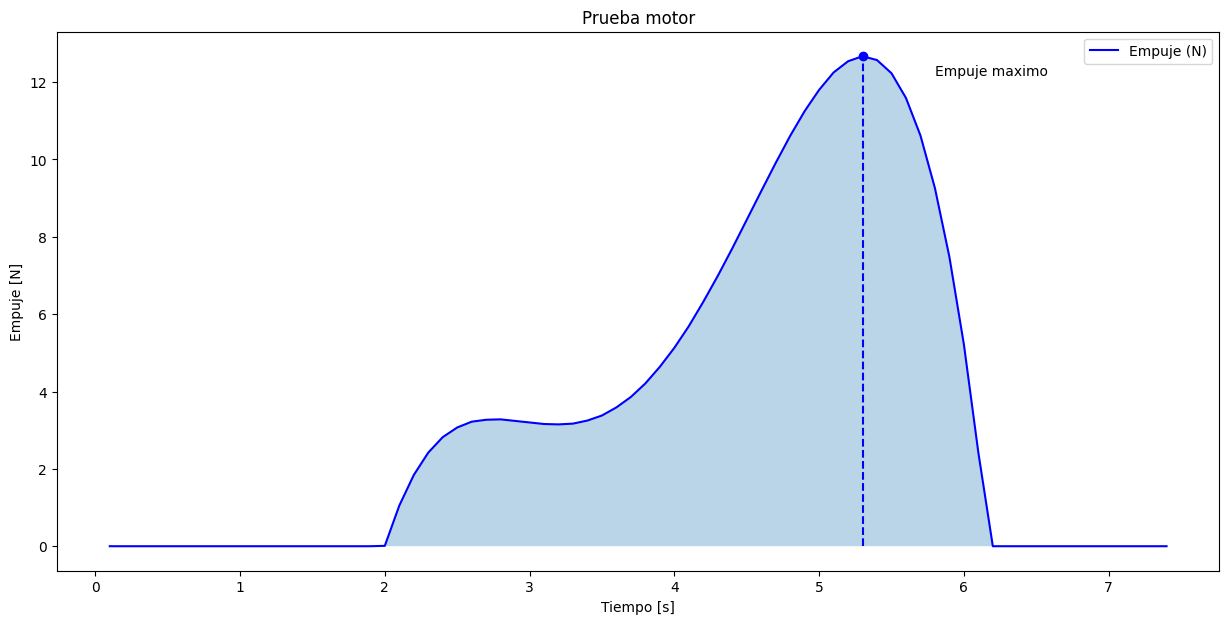

In [8]:
plt.figure(figsize=(15, 7))
plt.title("Prueba motor")
plt.plot(empuje["Time"], empuje["Trust"], 'b', label="Empuje (N)")
plt.fill_between(empuje["Time"], empuje["Trust"], alpha=0.3)

plt.annotate("Empuje maximo", xy=(tiempo_empuje_max, empuje_max), xytext=(tiempo_empuje_max + 0.5, empuje_max - 0.5) )
plt.plot(tiempo_empuje_max, empuje_max, 'bo')

plt.vlines(tiempo_empuje_max, 0, empuje_max, color='b', linestyle='--')

plt.ylabel("Empuje [N]")
plt.xlabel("Tiempo [s]")
plt.legend()
plt.show()